<a href="https://colab.research.google.com/github/Je-Hyeon/Je-Hyeon/blob/main/%EB%8D%B0%EC%82%AC%ED%86%B5%EA%B3%84%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Note) 

# df['컬럼명'] -> 어레이출력
# df[['컬럼명']] -> 데이터프레임 출력

# 1장

##  1.주별 살인률 데이터

* 기본적인 통계량 분석 
* 도수분포표 만들기 (중요!)
* 히스토그램, kde plot 그리기

### 통계량 분석

In [ ]:
state = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/state.csv')

state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
from scipy.stats import trim_mean


print(state['Population'].median())
print(state['Population'].mean())
# 절사 평균
trim_mean(state['Population'], 0.1)

4436369.5
6162876.3


4783697.125

In [ ]:
! pip install wquantiles

import wquantiles

# 가중평균
print(np.average(state['Murder.Rate'], weights=state['Population']))
# 가중 중간값
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.445833981123393


4.4

In [ ]:
from statsmodels import robust

# MAD : 평균 절대 편차
print(robust.mad(state['Population']))

# IQR
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

3849876.1459979336


4847308.0

In [ ]:
# 분위수 구하기, 보간법 선택할 수 있음

state['Murder.Rate'].quantile([0.05, 0.25,0.5,0.75,0.95], interpolation='linear')

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

### 도수분포표 만들기

In [ ]:
state.head(3)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ


In [ ]:
binned = pd.cut(state['Population'], 10, ordered=True)

binned.name= 'binned'

# 기존에 있던 state 데이터에 binned를 합쳐준다
df = pd.concat([state, binned], axis=1)

df.head(3)

,State,Population,Murder.Rate,Abbreviation,binned
0,Alabama,4779736,5.7,AL,"(4232659.0, 7901692.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
2,Arizona,6392017,4.7,AZ,"(4232659.0, 7901692.0]"


In [ ]:
# 두 가지 낯선 개념 사용: 1. append로 리스트에 딕셔너리를 추가시켜 버림
#                         2. join으로 데이터프레임의 데이터를 한번에 묶어버림

groups = []

for g,s in df.groupby(df['binned']):
  groups.append({
        'BinRange': g,
        'Count': len(s),
        'States': ','.join(s['Abbreviation']) 
    })

pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"AK,AR,CT,DE,HI,ID,IA,KS,ME,MS,MT,NE,NV,NH,NM,N..."
1,"(4232659.0, 7901692.0]",14,"AL,AZ,CO,IN,KY,LA,MD,MA,MN,MO,SC,TN,WA,WI"
2,"(7901692.0, 11570725.0]",6,"GA,MI,NJ,NC,OH,VA"
3,"(11570725.0, 15239758.0]",2,"IL,PA"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


### 히스토그램과 KDE Plot

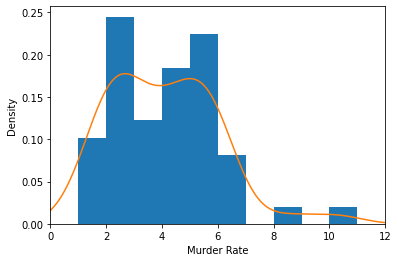

In [ ]:
# kde와 함께 히스토그램 그리기

ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate');

## 2.주식 데이터

* 상관관계 표 그리기
* 산점도 그리기
* 상관관계 히트맵


In [ ]:
sp500_sym = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/sp500_sectors.csv')
sp500_px = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/sp500_data.csv.gz', index_col=0)

In [ ]:
sp500_sym.head(1)

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS


In [ ]:
sp500_px.head(1)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.0221,0.0,0.0,0.018897,0.007368,0.092165,0.25914,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.0,0.015564,1.75,0.125,0.0


In [ ]:
sp500_sym['sector_label'].unique()

array(['Technology', 'Industrials', 'Energy', 'Consumer\nDiscretionary',
       'Utilities', 'Materials', 'EFTs', 'Telecom', 'Consumer\nStaples',
       'Financials', 'Health Care'], dtype=object)

In [ ]:
tele_sym = sp500_sym[sp500_sym['sector_label'] == 'Telecom']['symbol']
tele_sym

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [ ]:
tele_data = sp500_px[tele_sym]

tele_data.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.405853,0.283279,0.617035,0.061545
CTL,0.405853,1.000000,0.377644,0.385752,0.054534
FTR,0.283279,0.377644,1.000000,0.289295,0.067313
VZ,0.617035,0.385752,0.289295,1.000000,0.045919
LVLT,0.061545,0.054534,0.067313,0.045919,1.000000


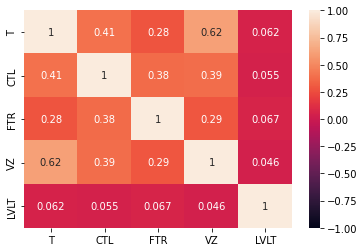

In [ ]:
# annot=True는 네모 위에 숫자를 표시해준다

sns.heatmap(tele_data.corr(), vmin=-1, vmax=1, annot=True)

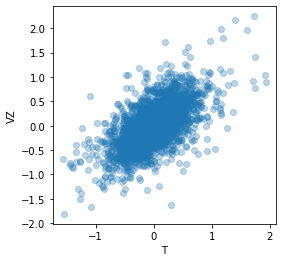

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(x = tele_data['T'], y=tele_data['VZ'], alpha=0.3)
plt.xlabel('T')
plt.ylabel('VZ');

In [ ]:
etf_sym = sp500_sym[sp500_sym['sector_label'] == 'EFTs']['symbol']

etf_sym[:3]

315    XLI
316    QQQ
317    SPY
Name: symbol, dtype: object

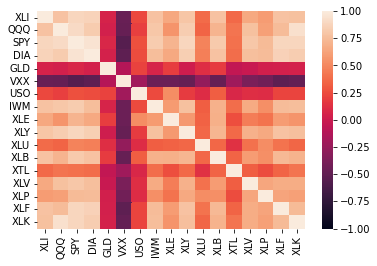

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01' , etf_sym]

sns.heatmap(etfs.corr(), vmin=-1, vmax=1);

## 3.가구별 과세 데이터

* 육각형 시각화
* 범주별로 그룹화 해서 시각화 하기

### hexbin 시각화

In [ ]:
kc_tax = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/kc_tax.csv.gz')

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

print(len(kc_tax0))
kc_tax0.head(3)

432693


,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0


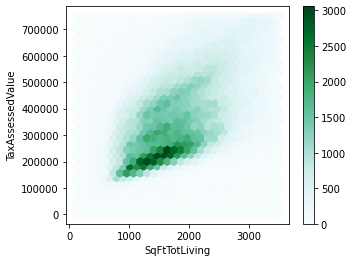

In [ ]:
kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))

### 범주별로 묶어서 시각화

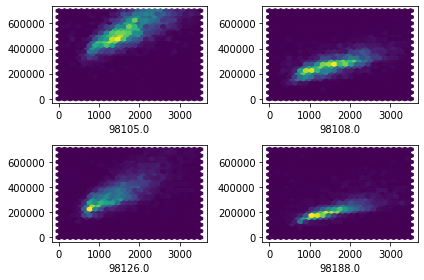

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]

kc_tax_zip = kc_tax0.loc[kc_tax0['ZipCode'].isin(zip_codes), :]

i = 1
for g,v in kc_tax_zip.groupby(kc_tax_zip['ZipCode']):

  plt.subplot(2,2,i)
  plt.hexbin(v['SqFtTotLiving'],v['TaxAssessedValue'], gridsize=25,extent=[0,3500,0,700000])
  plt.xlabel(g)

  i += 1

plt.tight_layout()

## 4.개인별 대출 결과 데이터

* 피벗테이블

### 피벗테이블 만들기

In [ ]:
lc_loans = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/lc_loans.csv')

lc_loans.tail()

,status,grade
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D
450960,Fully Paid,A


In [ ]:
crosstab = lc_loans.pivot_table(index='grade',columns='status', margins=True, aggfunc=lambda x:len(x) )

crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [ ]:
df = crosstab.copy().loc['A':'G',:]

df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


# 2장

# 새 섹션

## 정규분포와 표본분포 Plot


새로 알게된 내용
* plt.fill 이라는 plot을 배움
* ax.set_axis_off
* ax_set_xlim

In [ ]:
from scipy import stats

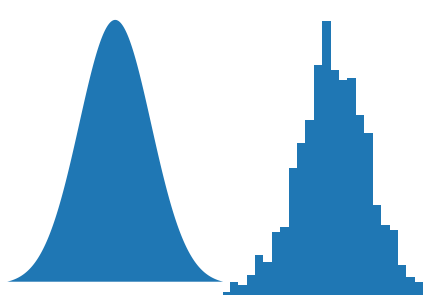

In [ ]:
np.random.seed(1)

x = np.linspace(-3,3,1000)
x_sample = stats.norm.rvs(size=1000)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax0 = ax[0]
ax0.fill(x, stats.norm.pdf(x))
ax0.set_axis_off()
ax0.set_xlim(-3,3)

ax1 = ax[1]
ax1.hist(x_sample, bins=30)
ax1.set_axis_off()
ax1.set_xlim(-3,3)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

## 표본 평균의 분포 Plot

* df.sample(n)은 데이터프레임에서 랜덤한 샘플을 뽑는다
* 데이터프레임을 읽을때, squeeze=True를 주니 시리즈처럼 읽는다

In [ ]:
loans_income = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/loans_income.csv', squeeze=True)
# squeeze=True 없이 인수를 주니 히스토그램을 구할 때 오류가 생겼다.

n5 = [loans_income.sample(5).mean() for _ in range(600)]
n20 = [loans_income.sample(20).mean() for _ in range(600)]

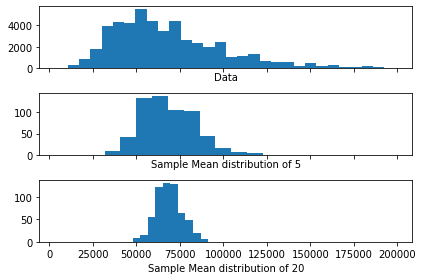

In [ ]:
fig, ax = plt.subplots(3,1,sharex= True)

ax0 = ax[0]
ax0.hist(loans_income, bins=30)
ax0.set_xlabel('Data')

ax1 = ax[1]
ax1.hist(n5)
ax1.set_xlabel('Sample Mean distribution of 5')

ax2 = ax[2]
ax2.hist(n20)
ax2.set_xlabel('Sample Mean distribution of 20')

plt.tight_layout()

## 부트스트랩 / 신뢰구간

* 부트스트랩 사용을 위해선 sktlearn의 resample 함수를 사용해야 함
* 부트스트랩 방식을 사용해서 신뢰구간을 만들 수 있음

In [ ]:
# 부트스트랩 방식을 사용하기 위해서 사이킷런의 리샘플 매서드를 사용해야한다
import sklearn as skt

boot = [skt.utils.resample(loans_income, n_samples=30).median() for _ in range(1000)]

pd.Series(boot).median()

61500.0

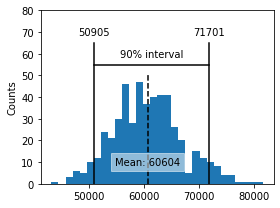

In [ ]:
# 코드는 annotation때문에 복잡해보임, 그냥 신뢰구간 수치만 구하고 싶으면, 부트스트랩방식으로 구한 것의 quantile만 구해주면 된다

# create a sample of 20 loan income data
sample20 = skt.utils.resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = skt.utils.resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))

ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()

ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)

ax.set_ylabel('Counts')

plt.tight_layout()

## QQ Plot

* 내가 목표로 하는 분포에 해당 데이터 분포가 얼마나 적합한지를 보여준다
( Default는 정규분포 )

* probplot은 항상 plot을 그려주는게 아니다 plot인수를 주어줘야지 그림을 그린다

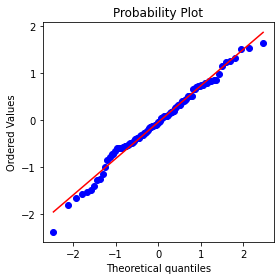

In [ ]:
from scipy import stats

norm_sample = stats.norm.rvs(size=100)

fig, ax = plt.subplots(figsize=(4,4))

# scipy.stats에 있는 probplot을 활용
stats.probplot(norm_sample, plot=ax)

plt.tight_layout();

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/sp500_data.csv.gz')

NFLX = df['NFLX']

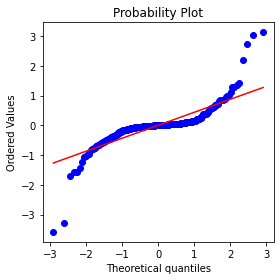

In [ ]:
NFLX = np.diff(NFLX[NFLX > 0])

fig, ax = plt.subplots(figsize=(4,4))

stats.probplot(NFLX, plot=ax)

plt.tight_layout()

## 기타 각종 분포

* 이항분포, 푸아송분포, 지수분포, 웨이불분포

In [ ]:
print(stats.binom.pmf(2, n=5, p=0.1))

print(stats.binom.cdf(2,n=5, p=0.1))

0.0729
0.99144


(0.0, 10.0)

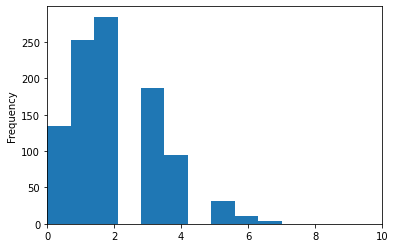

In [ ]:
sample = stats.poisson.rvs(2, size=1000)
s = pd.Series(sample)

s.plot.hist()

plt.xlim(0,10)

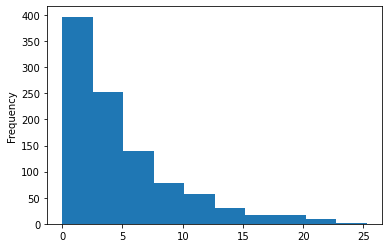

In [ ]:
sample = stats.expon.rvs(scale = 5, size=1000)

s2 = pd.Series(sample)

s2.plot.hist()

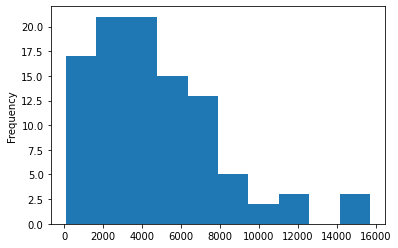

In [ ]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist();

# 3장

## 순열검정

* 데이터과학에서 T-test 또는 Z-test를 대신해서 사용하는 방법

* 수집한 데이터를 무작위로 섞은 뒤, 동일한 크기를 가진 데이터를 다시 만든다

In [ ]:
session_time = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/web_page_data.csv')

session_time['Time'] = session_time['Time'] * 100

session_time.head(5)

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


Mean Diff: 35.66666666666667


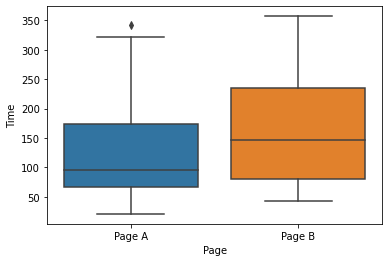

In [ ]:
sns.boxplot(x=session_time['Page'], y=session_time['Time'])

mean_b = session_time[session_time['Page'] == 'Page B']['Time'].mean()
mean_a = session_time[session_time['Page'] == 'Page A']['Time'].mean()

obs_mean = mean_b - mean_a

print('Mean Diff:', mean_b - mean_a)

In [ ]:
# 순열검정을 구현해보자
# 넘파이 랜덤 모듈이 아닌 그냥 랜덤모듈을 사용해야 함

import random

def perm_test(data, nx, ny):
  n = nx + ny
  idx_y = set(random.sample(range(n), ny))
  idx_x = set(range(n)) - idx_y

  return data.loc[list(idx_x)].mean() - data.loc[list(idx_y)].mean() 

In [ ]:
n_x = session_time[session_time['Page'] == 'Page A'].shape[0]
n_y = session_time[session_time['Page'] == 'Page B'].shape[0]

perm_test(session_time['Time'], n_x, n_y)

-2.980952380952374

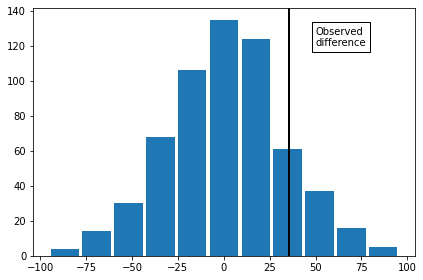

In [ ]:
random.seed(1)

perm_list = [perm_test(session_time['Time'], n_x, n_y) for _ in range(600)]

plt.hist(perm_list, bins=11, rwidth=0.9)
plt.axvline(obs_mean, c='k', lw=2)
plt.text(50,120, 'Observed\ndifference', bbox={'facecolor':'white'})
plt.tight_layout();

In [ ]:
# P-Value 구하기: Boolean array를 만들어서 mean을 사용하면 된다
ar = np.array(perm_list)

np.mean(ar > obs_mean)

0.14

In [ ]:
np.random.seed(1)
obs_pct_diff = 100* (200/ 23739 - 182 / 22588)

a = 23739 + 22588
b = 200 + 182

l = [0] * (a-b)
l.extend([1] * b)
l = pd.Series(l)

perm_list = [100 * perm_test(l, nx=23739, ny=22588) for _ in range(600)]

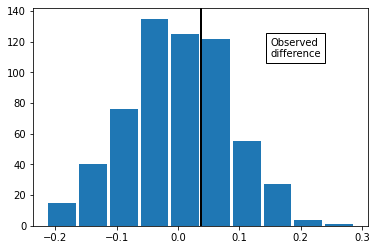

In [ ]:
plt.hist(perm_list, rwidth= 0.9)
plt.axvline(obs_pct_diff, color='k', lw= 2)
plt.text(0.15,110, 'Observed\ndifference', bbox={'facecolor':'white'});

In [ ]:
# P-Value 구하기

l2 = np.array(perm_list)
np.mean(l2 > obs_pct_diff)

0.31333333333333335

## ANOVA

* 순열을 사용한 분산분석 : 데이터과학에서 사용
* F-통계량을 사용한 분산분석 : 전통 통계학에서 사용



---
Two Way ANOVA

* formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)' 
* model = ols(formula, data).fit()
* aov_table = anova_lm(model, typ=2)

In [ ]:
four_sessions = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/four_sessions.csv')

four_sessions.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


In [ ]:
# 순열을 사용한 분산분석

observed_variance = four_sessions.groupby('Page').mean().var()[0]

def perm_test(df):
  df = df.copy()
  df['Time'] = np.random.permutation(df['Time'].values)   # values를 사용해서 Page는 가만히 두고, Time 값만 무작위로 섞는다.
  return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(four_sessions) for _ in range(600)]

np.mean(perm_variance > observed_variance)

0.065

In [ ]:
# F-통계량을 사용한 분산분석

import statsmodels.api as sm

model = sm.OLS.from_formula('Time ~ Page', data = four_sessions).fit()

aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


In [ ]:
click_rate = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/click_rates.csv')

clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')

clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [ ]:
mean = clicks.mean(axis=1)

mean

Click
Click        11.333333
No-click    988.666667
dtype: float64

In [ ]:
pd.DataFrame({'Headline A' : mean,
              'Headline B' : mean,
              'Headline C' : mean})

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [ ]:
import random

box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)     # 원본이 shuffle 된다

def chi2(observed, expected):
  pearson_residual = []
  for row, expect in zip(observed, expected):   # 두개의 sequence를 묶을 때 Zip를 사용함
    pearson_residual.append([ (observe - expect) ** 2 / expect for observe in row])

  return np.sum(pearson_residual)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34/3 , 1000 - 34/3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
  sample_clicks = [sum(random.sample(box, 1000)),
                   sum(random.sample(box, 1000)),
                   sum(random.sample(box, 1000))]

  sample_noclicks = [1000 - n for n in sample_clicks]
  return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(1000)]

resample_pvalue = sum(perm_chi2 > chi2observed) / len(perm_chi2)

print('chi2:', chi2observed)
resample_pvalue

chi2: 1.6659394708658917


0.482

# 4장

## 선형회귀분석

* 사이킷런 / 스텟츠 모델 사용

* 학습 및 예측 과정에서 데이터 프레임의 형태로 주어줘야 한다

* 모형의 학습, 예측, 시각화

In [ ]:
lung = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/LungDisease.csv')

lung.head()

# 해당 데이터에서 Exposure 값을 사용해 PEFR을 예측할 것임

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


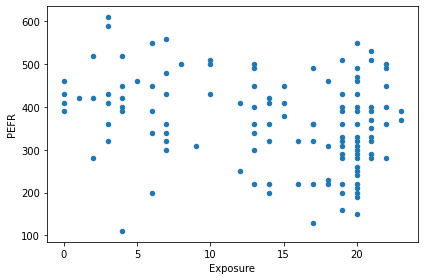

In [ ]:
# 회귀분석 전 scatter plot을 그려 보는 것은 기본이다

lung.plot.scatter(x='Exposure',y='PEFR')
plt.tight_layout();

In [ ]:
# 회귀 모형 학습 : model.fit(독립변수, 종속변수)
## 주의) lung[['Exposure']] 형태로 df를 만들어 줘야 함 -> lung['Exposure'] 형태면 오류 발생

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(lung[['Exposure']], lung[['PEFR']])   # Exposure로 PEFR을 예측해줘!

print(model.intercept_ , model.coef_)

[424.58280657] [[-4.18457649]]


In [ ]:
# 예측 : fit해둔 model로 예측, model.predict(예측변수)
## 주의) 예측변수를 데이터 프레임 형태로 주어줘야함 / fit한 모델의 feature 이름과 일치해야함

model.predict(pd.DataFrame({'Exposure': [10,20,50,100]}))

array([[382.73704172],
       [340.89127686],
       [215.3539823 ],
       [  6.12515803]])

In [ ]:
# 잔차구하기

fitted = model.predict(lung[['Exposure']])
residual = lung[['PEFR']] - fitted

residual.head(4)

,PEFR
0,-34.582807
1,-14.582807
2,5.417193
3,35.417193


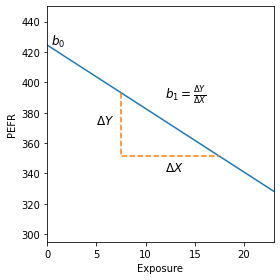

In [ ]:
# 회귀식을 그래프로 구현해보자

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')

# 회귀직선
ax.plot((0, 23), model.predict(pd.DataFrame({'Exposure': [0, 23]})))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = pd.DataFrame({'Exposure': [7.5,17.5]})
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


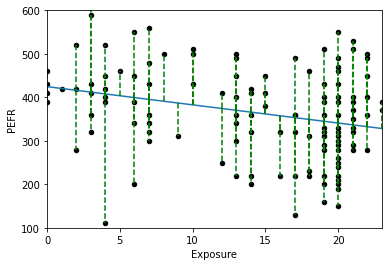

In [ ]:
# 잔차항과 회귀식 시각화

# 1. scatter plot
ax = lung.plot.scatter(x='Exposure', y='PEFR', c='k')
ax.set_xlim(0,23)
ax.set_ylim(100,600)

# 2. 회귀선 시각화
ax.plot((0,23), model.predict(pd.DataFrame({'Exposure':[0,23]})))

# 3. 잔차 시각화
for x, y_real , y_fit in zip(lung['Exposure'], lung['PEFR'], model.predict(lung[['Exposure']])):
 
  # (x값, x값) , (y값, y값)
  ax.plot((x,x), (y_fit, y_real), '--', c='g');

In [ ]:
# 이젠 다중 선형 회귀를 해보자

house = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/house_sales.csv', sep='\t')

house.head(3)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False


In [ ]:
# 싸이킷런을 활용한 다중선형 회귀
from sklearn.linear_model import LinearRegression

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

model2 = LinearRegression()
model2.fit(house[predictors], house[outcome])

print('intercept', model2.intercept_)
for name, coef in zip(predictors, model2.coef_):
  print(name,':', coef)

intercept -521871.36818828376
SqFtTotLiving : 228.83060360240796
SqFtLot : -0.06046682065307607
Bathrooms : -19442.840398321056
Bedrooms : -47769.95518521438
BldgGrade : 106106.96307898083


In [ ]:
# Statsmodels를 활용한 선형회귀

import statsmodels.api as sm

ols = sm.OLS.from_formula('AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        06:43:37   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

# From_formula가 아닌 싸이킷런 형식으로 변수를 주어줄 때는 상수를 추가해줘야 한다
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        06:47:26   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 참조 : 판다스 assign 매서드

df = pd.DataFrame({'a1': [1,2,3,4],
                   'a2' : [0,0,0,0]})

df.assign(y=10, axis=0)
# 새로운 열이 추가됨, 이름도 지정해 줄 수 있음 신기하군

,a1,a2,y,axis
0,1,0,10,0
1,2,0,10,0
2,3,0,10,0
3,4,0,10,0


## 회귀모형 평가

RMSE는 회귀모형을 평가하는 데 가장 널리 사용되는 측정 지표다

* R2 점수 : 0~1까지 모델에 의해 설명된 분산의 비율
* RMSE(제곱근 평균제곱오차): 평균제곱오차의 제곱근

In [ ]:
# 회귀모형 평가

from sklearn.metrics import r2_score, mean_squared_error

predict = model2.predict(house[predictors])

# RMSE
RMSE = np.sqrt(mean_squared_error(house[outcome], predict))

# r2 (R squared)
r2 = r2_score(house[outcome], predict)

print('RMSE :', RMSE)
print('R2 :', r2)

RMSE : 261220.19743696266
R2 : 0.5405875253381902


## 더미변수를 사용한 회귀분석

In [ ]:
# 회귀분석에 사용하기 위해 Propertype을 더미변수로 바꿔야 한다

house['PropertyType'].unique()

array(['Multiplex', 'Single Family', 'Townhouse'], dtype=object)

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']
outcome = 'AdjSalePrice'

# get_dummies는 Numerical data를 제외한 Categories 데이터만 알아서 더미변수로 변환환다

X = pd.get_dummies(house[predictors], drop_first=True)
X.head(3)

# Property_type이 더미변수로 바뀐 것을 확인할 수 있다

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,NbrLivingUnits,SqFtFinBasement,YrBuilt,YrRenovated,NewConstruction,PropertyType_Single Family,PropertyType_Townhouse
1,2400,9373,3.00,6,7,2,0,1991,0,False,0,0
2,3764,20156,3.75,4,10,1,1452,2005,0,True,1,0
3,2060,26036,1.75,4,8,1,900,1947,0,False,1,0


In [ ]:
# Boolean인 NewConstruction은 바뀌지 않았다, 따라서 따로 0과 1로 변환해야 한다

X['NewConstruction'] = X['NewConstruction'].replace( {True: 1,False: 0} )

X.head(3)

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,NbrLivingUnits,SqFtFinBasement,YrBuilt,YrRenovated,NewConstruction,PropertyType_Single Family,PropertyType_Townhouse
1,2400,9373,3.00,6,7,2,0,1991,0,0,0,0
2,3764,20156,3.75,4,10,1,1452,2005,0,1,1,0
3,2060,26036,1.75,4,8,1,900,1947,0,0,1,0


In [ ]:
house_lm = sm.OLS(house[outcome], X.assign(const=1))
result = house_lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        07:02:30   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## AIC / 단계적 회귀

* AIC : 모델에 항을 추가할 수록 불이익을 주는 회귀분석의 평가기준
* 단계적 회귀: Forward_selection, Backward_elimination

In [ ]:
!pip install dmba

from dmba import stepwise_selection
from dmba import AIC_score

     |████████████████████████████████| 11.8 MB 1.3 MB/s 
no display found. Using non-interactive Agg backend


AIC_score(y_true, y_pred, model=None, df=None)


: calculate Akaike Information Criterion (AIC)

    y_true: actual values
    y_pred: predicted values
    model (optional): predictive model
    df (optional): degrees of freedom of model

In [ ]:
outcome = 'AdjSalePrice'

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None

    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

# stepwise_selection에는 functions를 주어줘야 한다
best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose=True, )

print()
print('Intercept:', best_model.intercept_)
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(name, ':', coef)

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

Intercept: 6178645.017032571
Coefficients:
SqFtTotLiving : 199.27755304201884
BldgGrade : 137159.56022619773
YrBuilt : -3565.4249392492993
Bedrooms : -51947.38367361318
Bathrooms : 42396.164527717796
PropertyType_Townhouse : 84479.16203300405
SqFtFinBasement : 7.046974967553979
PropertyType_Single Family : 22912.055187017682


## 가중회귀

In [ ]:
# 가중회귀

## 데이터의 기록 년도를 회귀분석의 가중치로 사용할 것임 (오래된 데이터일 수록 가중치 Down)
house['Year'] = [i.split('-')[0] for i in house['DocumentDate']]

house['Weight'] = house['Year'].astype(int) - 2005

house[['DocumentDate','Year','Weight']].head(3)

,DocumentDate,Year,Weight
1,2014-09-16,2014,9
2,2006-06-16,2006,1
3,2007-01-29,2007,2


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wlm = LinearRegression()
# fit할 때 sample_weight자리에 가중치를 주어주면 된다
house_wlm.fit(house[predictors], house[outcome], sample_weight=house['Weight'])

for name, coef in zip(predictors, house_wlm.coef_):
  print(name, ':' , coef)

print('intercept :', house_wlm.intercept_)

SqFtTotLiving : 245.02408862720137
SqFtLot : -0.2924147480055357
Bathrooms : -26085.970108615045
Bedrooms : -53608.87643631369
BldgGrade : 115242.43472609227
intercept : -584189.3294459527


## 심화

* 밑에 잘 모르겠다.

In [ ]:
house = pd.read_csv('/content/drive/MyDrive/독학/Practical statistics/data/house_sales.csv', sep='\t')
house.head(3)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [ ]:
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()
print(zip_groups.ZipGroup.value_counts().sort_index())

0    16
1    16
2    16
3    16
4    16
Name: ZipGroup, dtype: int64


In [ ]:
model = sm.OLS.from_formula(formula='AdjSalePrice ~  SqFtTotLiving*ZipGroup + SqFtLot + ' +
     'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        08:13:06   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     